# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

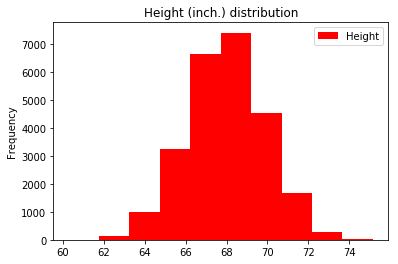

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [4]:
# Ваш код здесь
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


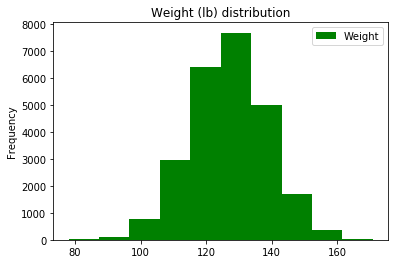

In [5]:
# Ваш код здесь
data.plot(y='Weight', kind='hist', color='green', title='Weight (lb) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [8]:
data.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


In [9]:
data.drop("BMI", axis=1, inplace=True)
data['BMI'] = make_bmi(data['Height'],data['Weight']) #delete in assignment version

In [10]:
data.head() #delete in assignment version

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

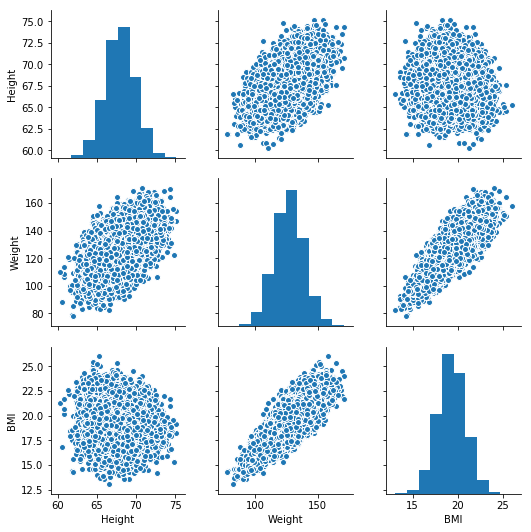

In [11]:
# Ваш код здесь
sns.pairplot(data=data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

Text(0,0.5,u'\u0420\u043e\u0441\u0442')

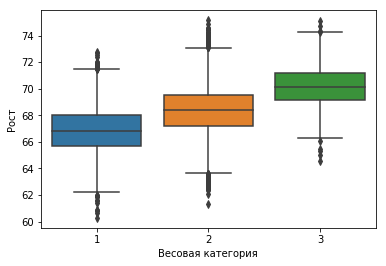

In [12]:
def weight_category(weight):
    
    # Ваш код здесь
    if weight < 120:
        w_category = 1
    elif weight >= 150:
        w_category = 3
    else:
        w_category = 2
    
    return w_category

data['Weight_cat'] = data.apply(lambda row: weight_category(row['Weight']), axis=1)





ax = sns.boxplot(x=data['Weight_cat'],y=data['Height'])
ax.set_xlabel(u'Весовая категория')
ax.set_ylabel(u'Рост')

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

Text(0.5,1,u'\u0417\u0430\u0432\u0438\u0441\u0438\u043c\u043e\u0441\u0442\u044c \u0440\u043e\u0441\u0442\u0430 \u043e\u0442 \u0432\u0435\u0441\u0430')

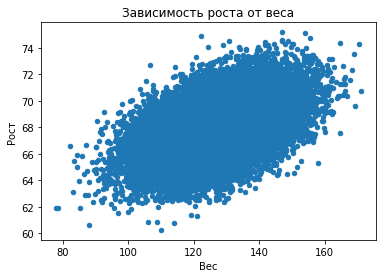

In [13]:
# Ваш код здесь

sc = data.plot(kind='scatter', x='Weight', y='Height')
sc.set_xlabel(u'Вес')
sc.set_ylabel(u'Рост')
sc.set_title(u'Зависимость роста от веса')


## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [14]:
# Ваш код здесь
def calculate_linear_error(x_array, y_array, w0_array, w1_array):
    #инициализация весов нулями
    #w0=pd.DataFrame({'w0':[0]*max(len(x_array), len(y_array))})
    #w1=pd.DataFrame({'w1':[0]*max(len(x_array), len(y_array))})
    
    error_list = []
    counter_w = 0
    for w0_i in w0_array:
        error_df = pd.DataFrame({'error_i':(y_array - (w0_array[counter_w] + w1_array[counter_w] * x_array))**2})
        error = error_df['error_i'].sum()
        error_list.append(error)
        counter_w += 1
    return error_list

# скорее всего, на входе здесь w0 и W1 должны быть числами, а не векторами

def quadratic_error(X, Y, w0, w1):
    """Вычисляет квадратичную ошибку линейной апроксимации.
        X, Y - массивы переменной и значений функции соотвественно,
        w0, w1 - коэффициенты уравнения прямой.    
    """
    counter = 0
    error = 0
    list_X = list(X)
    list_Y = list(Y)
    for y_i in list_Y:
        error += (list_Y[counter] - (w0 + w1 * list_X[counter]))**2
        counter += 1
    return error

# 3rd time try

def lin_err(w_0, w_1):
    x = np.array(data['Weight'])
    y = np.array(data['Height'])
    return np.sum((y - (w_0 + w_1 * x)) ** 2)

def error_2(w):
    x = np.array(data['Weight'])
    y = np.array(data['Height'])
    return np.array(map(lambda w0, w1: np.sum((y - (w0 + w1 * x))**2), w[0], w[1]))

In [15]:
mapped = map(lambda w0, w1: lin_err(w0, w1), np.arange(-5,5,1), np.arange(-5,5,1))
print mapped

lin_err_vectorized = np.vectorize(lin_err, otypes=[np.ndarray])


[12633277556.971527, 8475724522.667707, 5145186949.153848, 2641664836.4299464, 965158184.4960047, 115666993.35202293, 93191262.99800049, 897730993.4339375, 2529286184.659834, 4987856836.675691]


Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

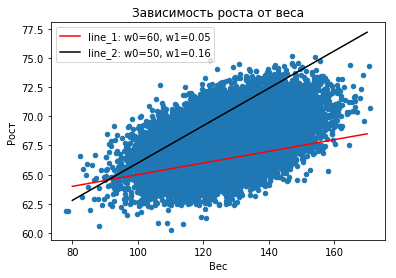

In [16]:
# Ваш код здесь
#w_array = data['Weight']
#y_1 = 60 + 0.05 * w_array
#y_2 = 50 + 0.16 * w_array

interval = np.linspace(80,170,2)
line_1 = 60 + 0.05 * interval
line_2 = 50 + 0.16 * interval

sc = data.plot(kind='scatter', x='Weight', y='Height')
sc.set_xlabel(u'Вес')
sc.set_ylabel(u'Рост')
sc.set_title(u'Зависимость роста от веса')

#plt.scatter(data['Weight'], data['Height'], 1)
plt.plot(interval, line_1, label='line_1: w0=60, w1=0.05', color='red')
plt.plot(interval, line_2, label='line_2: w0=50, w1=0.16', color='black')

plt.legend(loc='upper left')

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

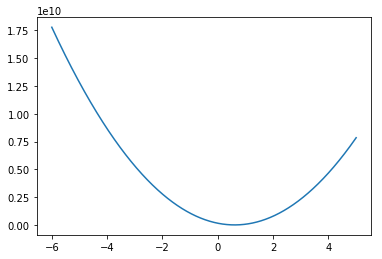

In [17]:
w0 = 50
w1 = np.linspace(-6, 5, 1000)
#w1 = 0.1
err = quadratic_error(data['Weight'], data['Weight'], w0, w1)

plt.plot(w1, err)

In [18]:
#delete in assignment version



w0 = np.array([50] * 1000)
w1 = np.linspace(-6, 5, 1000)
lin_err(w0, w1)
w = np.append(w0, w1)
w = w.reshape((2,1000))

print w

w_T = np.transpose(w)
print w_T

ValueError: operands could not be broadcast together with shapes (1000,) (25000,) 

In [19]:
#delete in assignment version

#lin_err(data['Weight'], data['Height'], np.array([50, 0.14]))

def get_error_array(w_T):
    error_array = []
    for w_i in w_T:
        error_array = np.append(error_array, lin_err(data['Weight'], data['Height'], w_i))
    return error_array

plt.plot(w1, get_error_array(w_T))
#def range_err(w0:np.ndarray, w1:np.ndarray):

NameError: name 'w_T' is not defined

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [21]:
# Ваш код здесь
from scipy import optimize

#def error_2(x):
#    return quadratic_error(data['Weight'], data['Weight'], 50, x)


w1_opt = optimize.minimize_scalar(lambda x: quadratic_error(data['Weight'], data['Height'], 50, x), bounds=[-5,5])
print(w1_opt)

w1_opt_2 = optimize.minimize_scalar(lambda x: lin_err(50, x), bounds=[-5,5])
print(w1_opt)

     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385
     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385


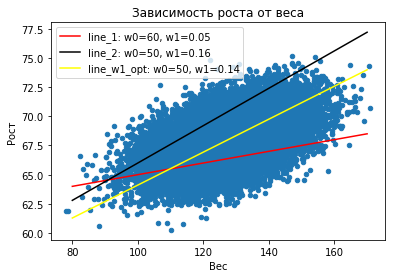

In [22]:
# Ваш код здесь

line_w1_opt = 50 + w1_opt.x * interval

sc = data.plot(kind='scatter', x='Weight', y='Height')
sc.set_xlabel(u'Вес')
sc.set_ylabel(u'Рост')
sc.set_title(u'Зависимость роста от веса')

plt.plot(interval, line_1, label='line_1: w0=60, w1=0.05', color='red')
plt.plot(interval, line_2, label='line_2: w0=50, w1=0.16', color='black')
plt.plot(interval, line_w1_opt, label='line_w1_opt: w0=50, w1=0.14', color='yellow')

plt.legend(loc='upper left')

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [23]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

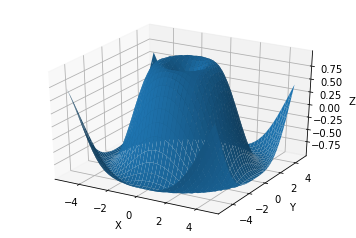

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
#print(type(Z))
#print(Z)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

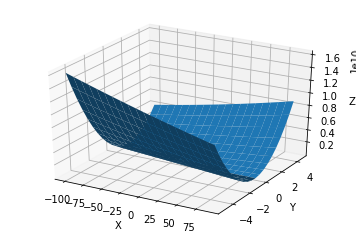

In [49]:
# Ваш код здесь
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-100, 100, 10) #w0
Y = np.arange(-5, 5, .5) #w1
X, Y = np.meshgrid(X, Y)
#Z = np.array(map(lambda w0, w1: lin_err_vectorized(w0, w1), X, Y))
#print(type(Z))
#print(Z)
Z = np.array(map(lambda w0, w1: lin_err_vectorized(w0, w1), X, Y))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [29]:
x0 = np.array([0, 0])
print x0
print x0.shape

def lin_err_2(w):
    x = np.array(data['Weight'])
    y = np.array(data['Height'])
    return np.sum((y - (w[0] + w[1] * x))**2)

w01_opt = optimize.minimize(lin_err_2, x0, method='L-BFGS-B')
print(w01_opt)

[0 0]
(2L,)
      fun: 67545.2870864093
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00145519, -0.02764864])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 5
   status: 0
  success: True
        x: array([57.57178342,  0.08200643])


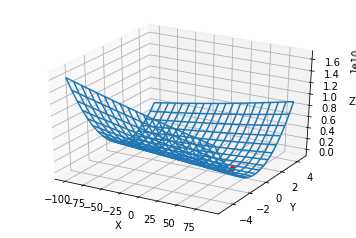

In [47]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-100, 100, 10) #w0
Y = np.arange(-5, 5, .5) #w1
X, Y = np.meshgrid(X, Y)
Z = np.array(map(lambda w0, w1: lin_err_vectorized(w0, w1), X, Y))
x_opt, y_opt = w01_opt.x
opt = ax.scatter(x_opt, y_opt, w01_opt.fun, s=20, c='red')
surf = ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)



plt.show()

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)